In [11]:
def load_src(name, fpath):
    import os, imp
    return imp.load_source(name, os.path.join(os.path.dirname('__file__'), fpath))

load_src("QPP_Funcs", "../QPP_Funcs.py")

import numpy as np
import matplotlib.pyplot as plt
import QPP_Funcs as qpp
import celerite as ce
import corner


qpoparams = [np.log(9e8), 1.5, -4]
modelparams = [11.33844804, 6.92311406, 6.85207764, np.log(1000)]
log_params = qpoparams + modelparams
N = 4000
t = np.linspace(1,2001, N)

In [12]:
truemodel = qpp.CTSModel_prior(log_A = log_params[3], log_tau1 = log_params[4], log_tau2 = log_params[5], log_bkg = log_params[6])
truekernel = qpp.SHOTerm_Prior(log_S0 = log_params[0], log_Q = log_params[1], log_omega0 = log_params[2])

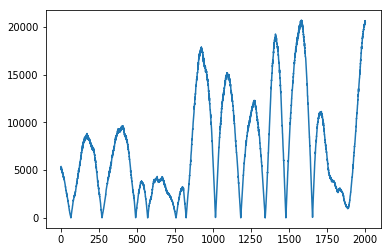

In [13]:
GP = qpp.simulate_gp(t,  truekernel, noisy=True)

plt.plot(t,GP)
plt.show()

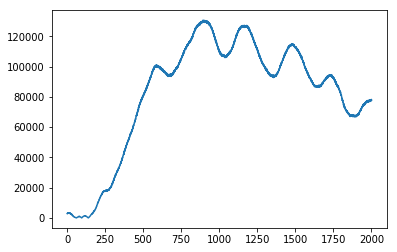

In [14]:
I = qpp.simulate(t, truemodel, truekernel, noisy=True)
plt.plot(t,I)
plt.show()